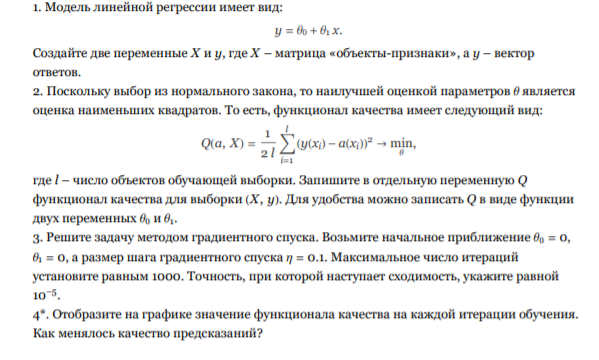

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n=1000
X = np.arange(n) / n + 0.1 * np.random.normal(0, 1, n)
Y = 10*np.arange(n) / (n + 1) + 0.1 * np.random.normal(0, 1, n)

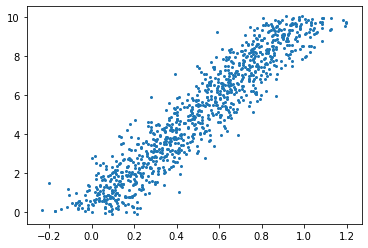

In [3]:
plt.scatter(X,Y,4)

In [4]:
matrix=np.array([X,np.ones(X.size)]).transpose()

In [5]:
def Q(theta,theta1): #функционал качества
    return np.sum((Y-matrix.dot(np.array([theta,theta1])))**2)/2*Y.size

In [6]:
def Q_diff_x(x, y):#функции для поиска частных производных в точке
    return sum((Y - matrix.dot(np.array([x, y])))*-matrix[:, 0])/n

def Q_diff_y(x, y):
     return sum((Y - matrix.dot(np.array([x, y])))*-matrix[:, 1])/n

In [7]:
def gradient_descent(x0, y0, eps,nu,maxstep): # градиентный спуск
    x = x0
    y = y0
    i=0
    list_of_Q=[]
    while i<maxstep:
        i=i+1
        x1, y1 = x, y
        x = x - nu * Q_diff_x(x,y)
        y = y - nu * Q_diff_y(x,y)
        list_of_Q.append(Q(x,y))
        if (abs(x - x1) + abs(y - y1) < eps): #критерий остановки
            return x, y,list_of_Q
    return x, y,list_of_Q

In [8]:
#начальные данные
theta_0=0
theta1_0=0
maxstep=1000
nu=0.1
eps=10**-5

In [9]:
result=gradient_descent(theta_0,theta1_0,eps,nu,maxstep)
theta=result[0]
theta1=result[1]
a=matrix.dot(np.array([theta,theta1]))
print(theta,theta1)

8.997608240750274 0.5301689798194262


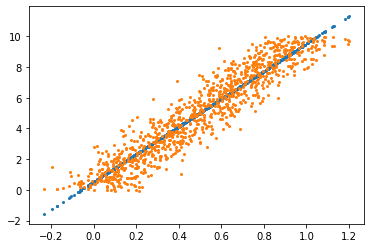

In [10]:
plt.scatter(X,a,4)
plt.scatter(X,Y,4)

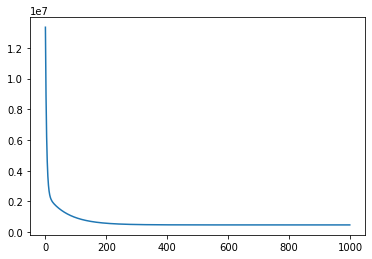

In [11]:
plt.plot(result[2])